# Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)      # iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3,1]]
y_pred = per_clf.predict(X_new)

In [2]:
y_pred

array([ True, False])

# Regression MLP

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data,
    housing.target,
    random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full,
    y_train_full,
    random_state=42
)

# MLP
mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50, 50, 50],
    random_state=42
)

pipeline = make_pipeline(
    StandardScaler(),
    mlp_reg
)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)


In [4]:
rmse

0.5053326657968684

# MLP with keras
## Image classifier with sequential API

In [5]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

2025-10-12 08:03:14.695669: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


In [7]:
X_train.shape

(55000, 28, 28)

In [8]:
X_train.dtype

dtype('uint8')

In [9]:
# scaling pixel intensities down to 0-1 range
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.


In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

In [11]:
# creating model using sequential API with 2 hidden layers
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/mnt/Programming/ML/intro_ann/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1760252640.618818     528 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2101 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# model's list of layers
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [14]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [15]:
# parameters of the layer
weights, biases = hidden1.get_weights()
weights

array([[ 0.04907257, -0.03251224, -0.03290945, ..., -0.0639431 ,
         0.05928616, -0.01543592],
       [ 0.0580086 , -0.02185868,  0.03875533, ...,  0.03187221,
        -0.04999991,  0.03126957],
       [ 0.04202823, -0.02651167,  0.02258451, ...,  0.0623641 ,
        -0.03301999, -0.00541567],
       ...,
       [-0.0679965 , -0.00847582, -0.00819805, ...,  0.02568026,
         0.05209835, -0.00483762],
       [-0.02582082,  0.07281058,  0.03196067, ..., -0.02073653,
         0.06741099, -0.06846382],
       [ 0.05634274, -0.01018224,  0.01110178, ...,  0.05006103,
        -0.00225517, -0.07414632]], shape=(784, 300), dtype=float32)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
biases.shape

(300,)

### compiling

In [18]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics = ["accuracy"]
)

### training and evaluating the model

In [19]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2025-10-12 08:04:06.182116: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 172480000 exceeds 10% of free system memory.
2025-10-12 08:04:06.405447: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 172480000 exceeds 10% of free system memory.
2025-10-12 08:04:07.280105: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f0b00004ef0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-12 08:04:07.280141: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-10-12 08:04:07.666465: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-12 08:04:08.354161: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91301


  41/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2017 - loss: 2.1987 

I0000 00:00:1760252650.422558     624 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7619 - loss: 0.7296 - val_accuracy: 0.8328 - val_loss: 0.5078
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8303 - loss: 0.4901 - val_accuracy: 0.8406 - val_loss: 0.4552
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8451 - loss: 0.4451 - val_accuracy: 0.8460 - val_loss: 0.4328
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8538 - loss: 0.4177 - val_accuracy: 0.8508 - val_loss: 0.4206
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8603 - loss: 0.3977 - val_accuracy: 0.8514 - val_loss: 0.4120
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8658 - loss: 0.3816 - val_accuracy: 0.8534 - val_loss: 0.4042
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8700 - loss: 0.3680 - val_accuracy: 0.8558 - val_loss: 0.3973
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8740 - loss: 0.3564 - val_accurac

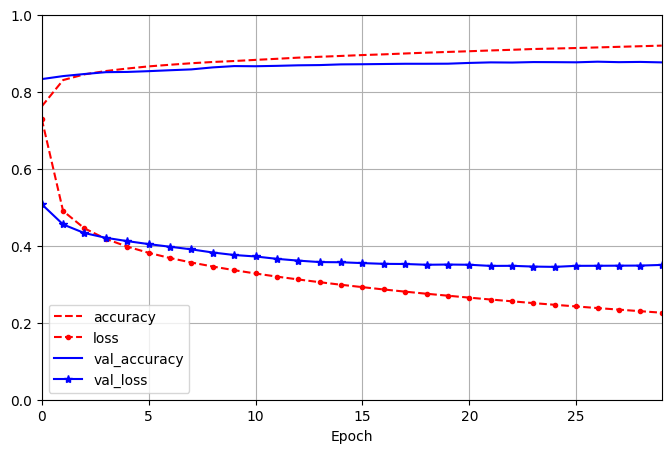

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.","b-", "b-*"]
)
plt.show()

In [21]:
model.evaluate(X_test, y_test)

 58/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8818 - loss: 0.3712

2025-10-12 08:06:00.020482: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.
2025-10-12 08:06:00.037074: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8721 - loss: 0.3781


[0.378071665763855, 0.8720999956130981]

### predictions

In [22]:
X_new = X_test[:3]      # using first 3 from test set
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.02, 0.  , 0.86],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [23]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


In [24]:
# checking if the predictions are correct or not
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

they are correct indeed

## Regression MLP using Sequential API

In [25]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape = X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1),
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

/mnt/Programming/ML/intro_ann/venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


2025-10-12 08:34:20.575028: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - RootMeanSquaredError: 2.9259 - loss: 8.5611 - val_RootMeanSquaredError: 2.9030 - val_loss: 8.4273
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 2.8829 - loss: 8.3111 - val_RootMeanSquaredError: 2.8992 - val_loss: 8.4053
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 2.8783 - loss: 8.2848 - val_RootMeanSquaredError: 2.9001 - val_loss: 8.4103
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - RootMeanSquaredError: 2.8764 - loss: 8.2738 - val_RootMeanSquaredError: 2.8986 - val_loss: 8.4017
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 2.8751 - loss: 8.2663 - val_RootMeanSquaredError: 2.8958 - val_loss: 8.3856
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 2.8741 - loss: 8.2603 - val_RootMeanSquaredError: 2.8933 - val_loss: 8.3710
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - RootMeanSquaredError: 2.8733 -

In [26]:
y_pred

array([[[4.4408984],
        [4.4408984],
        [4.4408984],
        [4.4408984],
        [4.4408984],
        [4.4408984],
        [4.4408984],
        [4.441009 ],
        [4.4392834],
        [4.4518566],
        [4.4813967],
        [4.4819646],
        [4.4830346],
        [4.480675 ],
        [4.47779  ],
        [4.481863 ],
        [4.482518 ],
        [4.4790664],
        [4.4833717],
        [4.481613 ],
        [4.492782 ],
        [4.460895 ],
        [4.4408984],
        [4.4408984],
        [4.4408984],
        [4.4408984],
        [4.4408984],
        [4.4408984]],

       [[4.425816 ],
        [4.347021 ],
        [4.362694 ],
        [4.362381 ],
        [4.357717 ],
        [4.3727922],
        [4.3481603],
        [4.402567 ],
        [4.393746 ],
        [4.411347 ],
        [4.355137 ],
        [4.3901296],
        [4.390698 ],
        [4.3955173],
        [4.3920794],
        [4.387346 ],
        [4.382955 ],
        [4.3785257],
        [4.378099 ],
        [4.